<a href="https://colab.research.google.com/github/Srijavali/Ai-ml-projects-labs-submission/blob/main/AIML_Module_5_Lab_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:

k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]


In [3]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)

        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix])

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']

        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so

        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [4]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)

        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)

        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

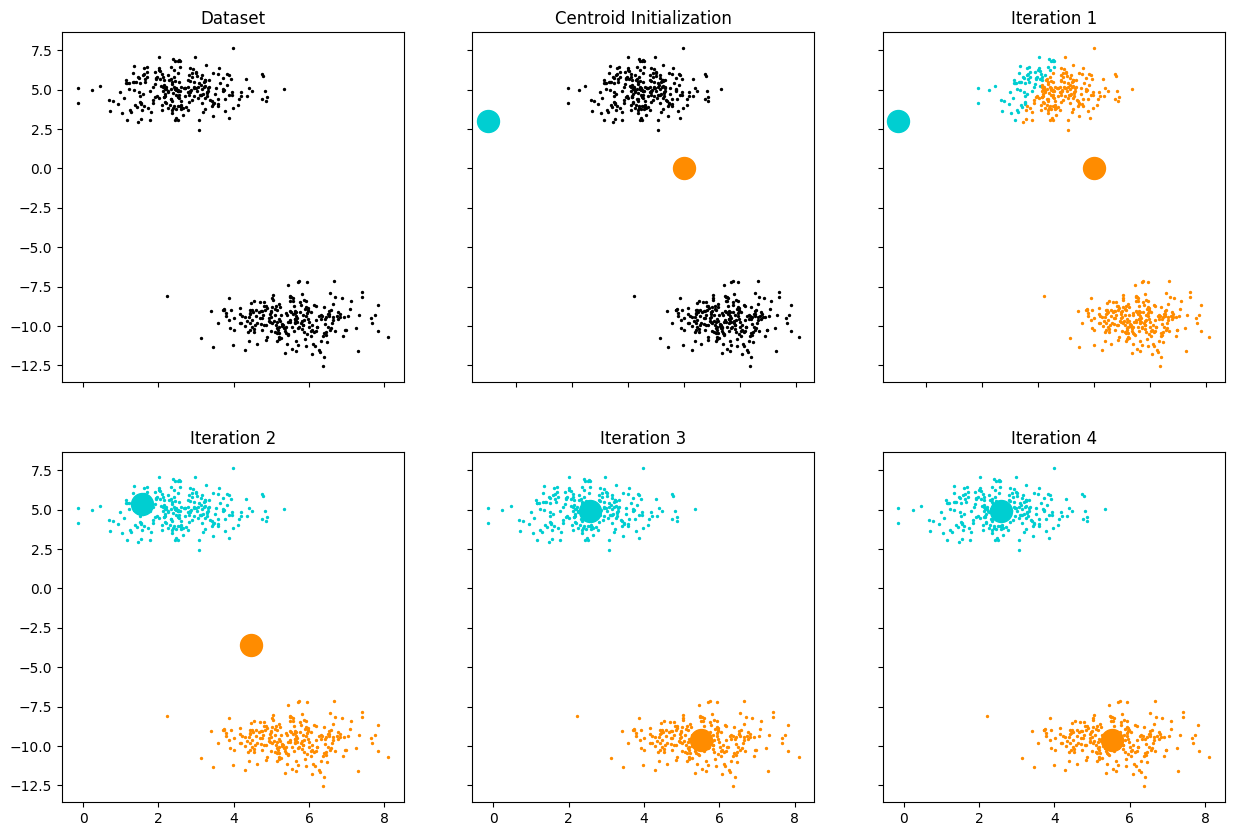

In [5]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [6]:
# Generating Synthetic Data

k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


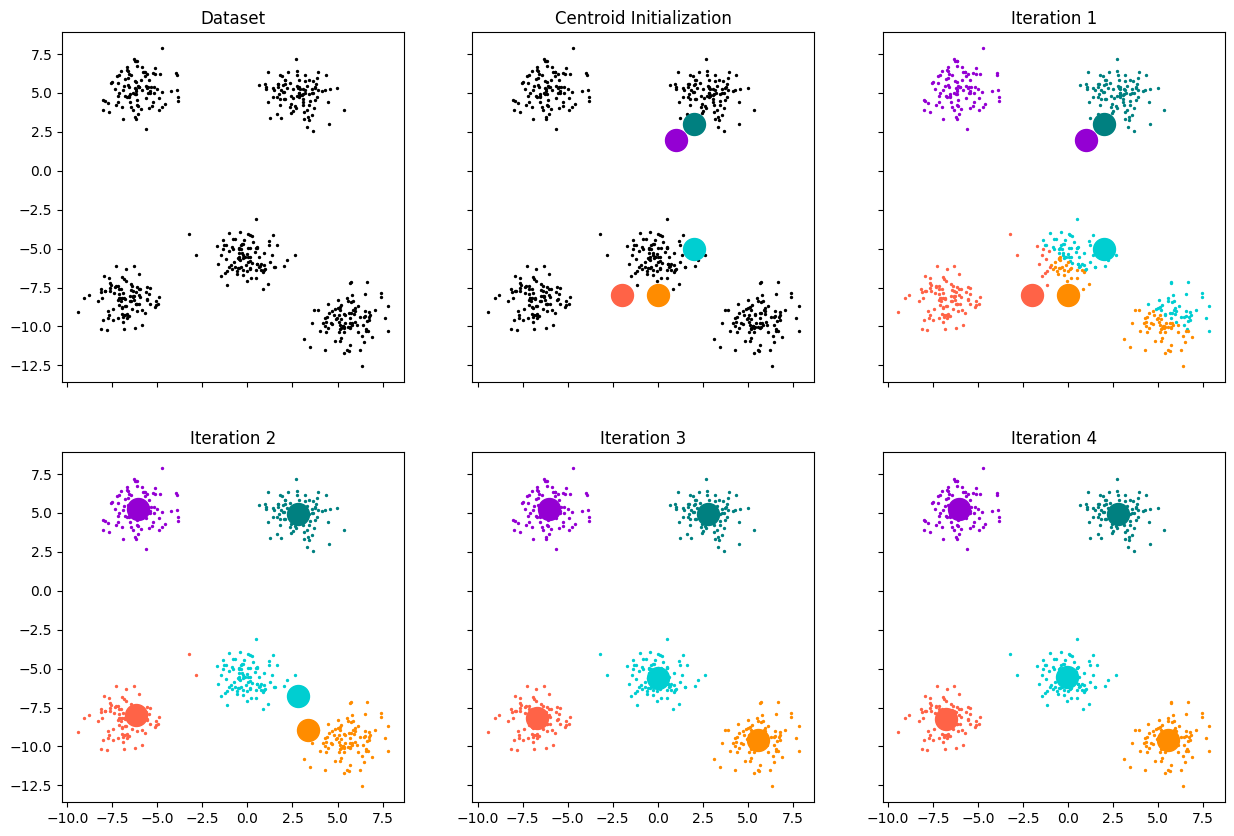

In [7]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [8]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

In [9]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

KMeans(n_clusters=5)

ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[-6.06533341  5.2400571 ]
 [-0.06909909 -5.56399319]
 [ 5.56873506 -9.60861515]
 [ 2.78561142  4.93182424]
 [-6.78567723 -8.26282547]]



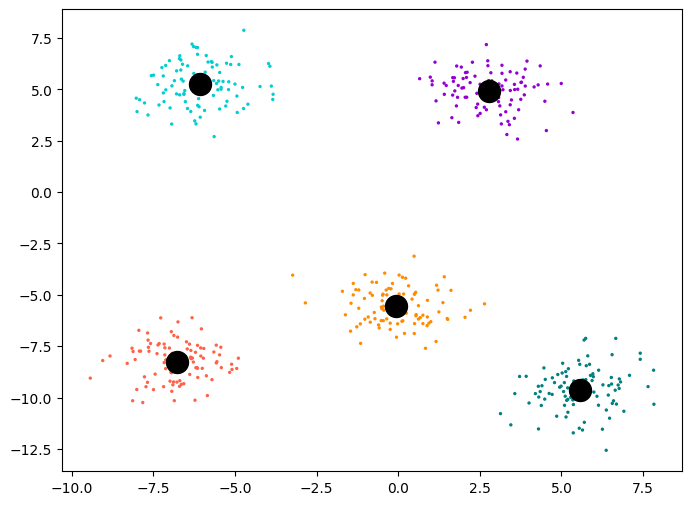

In [10]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

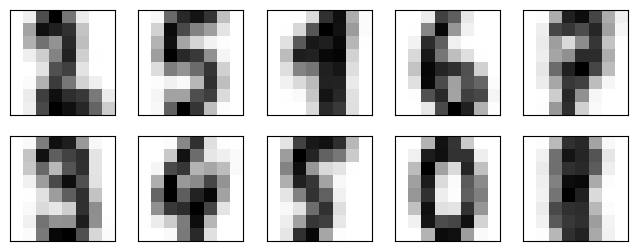

In [13]:
# We can now see how the centers of the clusters formed are

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

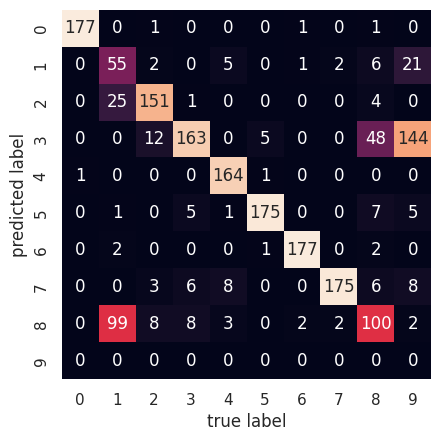

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets

In [18]:
#import the dataset
iris = datasets.load_iris()
# print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[3 0 0 0 3 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 3 3 3 0 0 3 3 3 0 0 3
 3 0 3 3 0 0 3 3 0 3 0 3 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 1 4 1 4 1 1 2 1 1 1 4
 4 1 4 4 4 4 1 1 4 1 4 1 4 1 1 4 4 4 1 1 1 4 4 4 1 1 4 4 1 1 4 4 1 1 4 4 4
 4 4]


array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [7.08695652, 3.12608696, 6.01304348, 2.14347826],
       [5.58      , 2.63333333, 3.98666667, 1.23333333],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.29361702, 2.9       , 4.95106383, 1.72978723]])

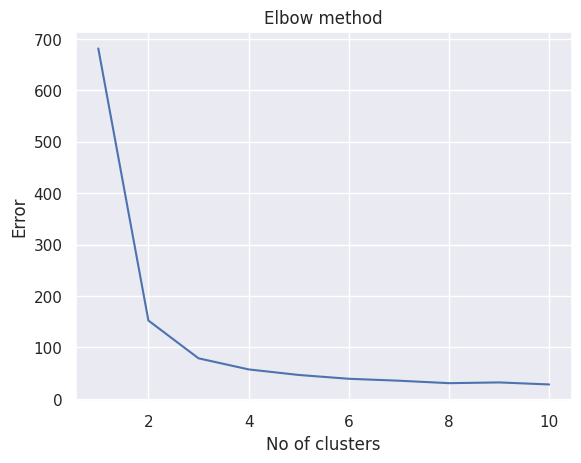

In [20]:
'''How do we choose the optimal number of clusters? There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.

This graph generally ends up shaped like an elbow, hence its name:'''
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [21]:
'''The output graph of the Elbow method shows that the shape of elbow is approximately formed at k=3. The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.'''
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

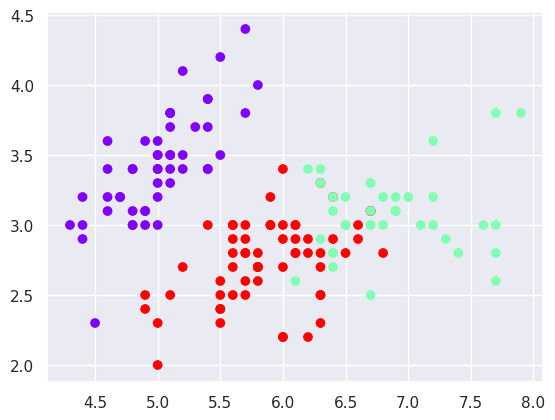

In [22]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

In [ ]:
'''Is feature scaling essential for KMeans as it is for most ML algos? Explain.'''


Yes, feature scaling is essential for K-Means clustering, just as it is for most machine learning algorithms that rely on distance-based computations. Here’s why:

Feature Scaling is important in K-means Clustering because

**K-Means Uses Distance Metrics**

K-Means relies on Euclidean distance to assign data points to clusters.
If features have different scales (e.g., one feature ranges from 0 to 1 while another ranges from 1 to 10,000), the clustering results will be biased towards larger-valued features.

**Unscaled Data Leads to Incorrect Clustering**

For example, if a dataset has height (in cm) and weight (in kg), the weight values, which are typically larger, will dominate the distance calculation. This makes clustering based on height almost irrelevant.

**Centroids Will Be Distorted**

K-Means updates cluster centroids based on the average position of points.
If one feature dominates due to scale, centroids will shift towards that feature, leading to poor clustering performance.

**Improves Convergence**

Scaling ensures that all features contribute equally, allowing the algorithm to converge faster and more effectively.

Always scale your features before using K-Means to ensure fair clustering, avoid bias, and improve performance.

#What are ways to prevent initialization variation in KMeans?

Initialization variation in K-Means can lead to different cluster assignments and convergence to local optima. To reduce this variation and ensure more stable clustering, consider the following techniques:

 Use K-Means++ Initialization

Instead of selecting initial centroids randomly, K-Means++ selects them in a way that spreads them out. This reduces the chances of poor initialization and improves convergence. It is the default initialization method in most libraries, including scikit-learn.

Increase the Number of Initializations (n_init Parameter)

Running K-Means multiple times with different random initializations and selecting the best clustering, based on inertia or another metric, improves stability. In scikit-learn, this is controlled by the n_init parameter. A higher n_init value, such as 10 or more, reduces sensitivity to initialization.

Use Hierarchical Clustering or Other Methods for Initialization

Performing hierarchical clustering first and using its centroids as the initial seeds for K-Means can lead to better results. Other approaches, such as PCA-based initialization, can also help select better starting points.

Use Multiple Runs and Ensemble Clustering

Running K-Means multiple times and using an ensemble approach, such as majority voting, can improve the robustness of clustering results.

Apply Robust Variants of K-Means

Some variations, such as K-Medoids or Gaussian Mixture Models (GMM), can be less sensitive to initialization. Mini-Batch K-Means can also be useful for handling large datasets while reducing initialization sensitivity.

Normalize or Scale Features Before Clustering

Feature scaling ensures that no variable dominates the distance calculations, reducing the likelihood of poor initialization effects.

By applying these techniques, you can significantly reduce initialization variation and obtain more stable clustering results.

#What is the training and testing complexity of KMeans?

The training and testing complexity of K-Means clustering depends on the number of data points, features, clusters, and iterations required for convergence.

Training Complexity

The training phase of K-Means consists of two main steps:

Assignment step: Each data point is assigned to the nearest centroid.

Update step: The centroids are updated based on the mean of the assigned points.

For n data points, d dimensions (features), k clusters, and i iterations, the complexity is:

O(n.k.d.i)

n: Number of data points

k: Number of clusters

d: Number of features

i: Number of iterations (usually small, as K-Means converges quickly)

Since i is often much smaller than n, the complexity is typically close to O(nkd).

Best-Case Complexity
If K-Means converges very quickly (in a few iterations), the complexity can be O(nkd).

Worst-Case Complexity
In some cases, K-Means may take many iterations to converge, leading to O(nkd i), where i can be large if the initialization is poor.

Testing Complexity

After training, assigning a new data point to the closest cluster requires computing the distance to each centroid, leading to:

O(kd)

For m test samples, the total testing complexity is:

O(mkd)

Training complexity is O(nkd i), but often approximated as O(nkd) due to quick convergence.

Testing complexity is O(mkd), which is much lower than training complexity.

K-Means scales linearly with the number of data points, making it efficient for large datasets, though the choice of k and initialization can affect performance.

In [23]:
'''Hierarchical Clustering
KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.'''
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   1541      0  0:00:02  0:00:02 --:--:--  3401
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 15021  100 15021    0     0   3777      0  0:00:03  0:00:03 --:--:--  8809


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [26]:
X = dataset.iloc[:, [3, 4]].values

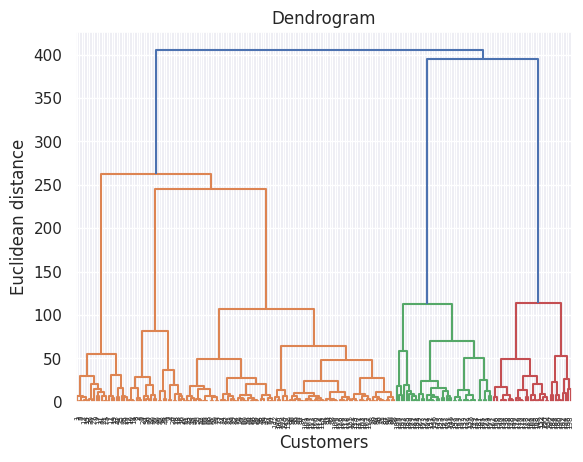

In [27]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

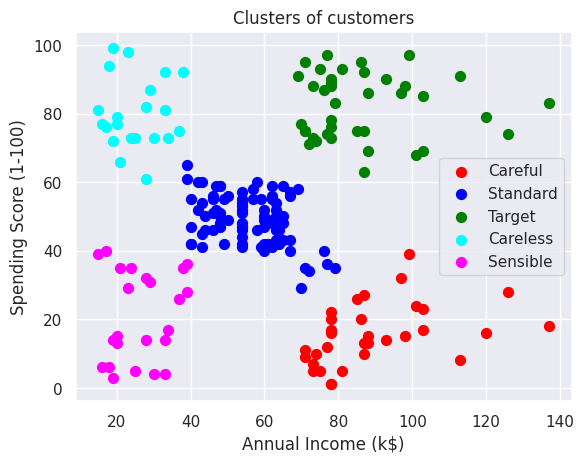

In [29]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


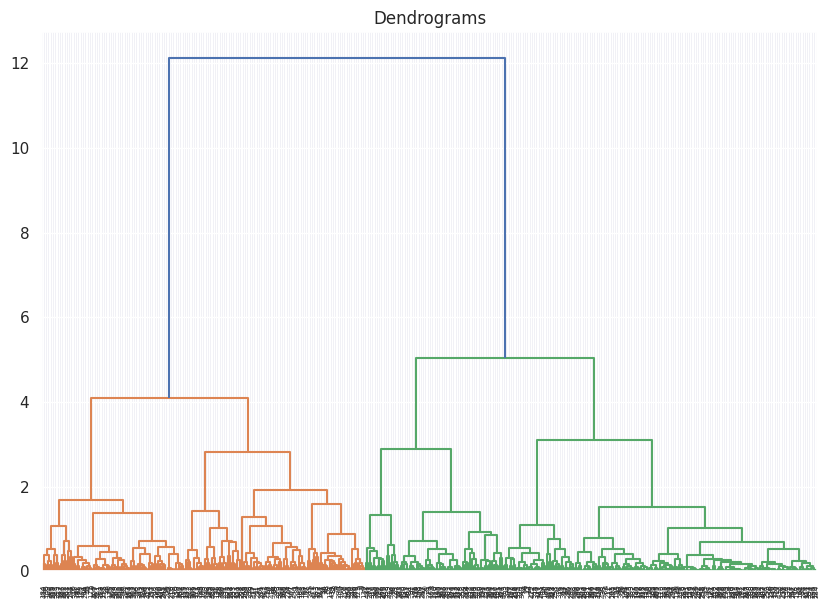

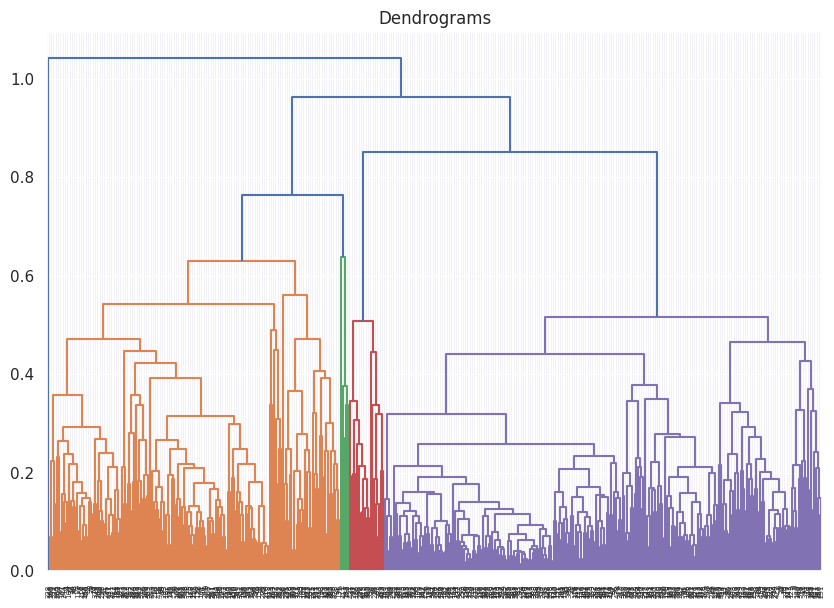

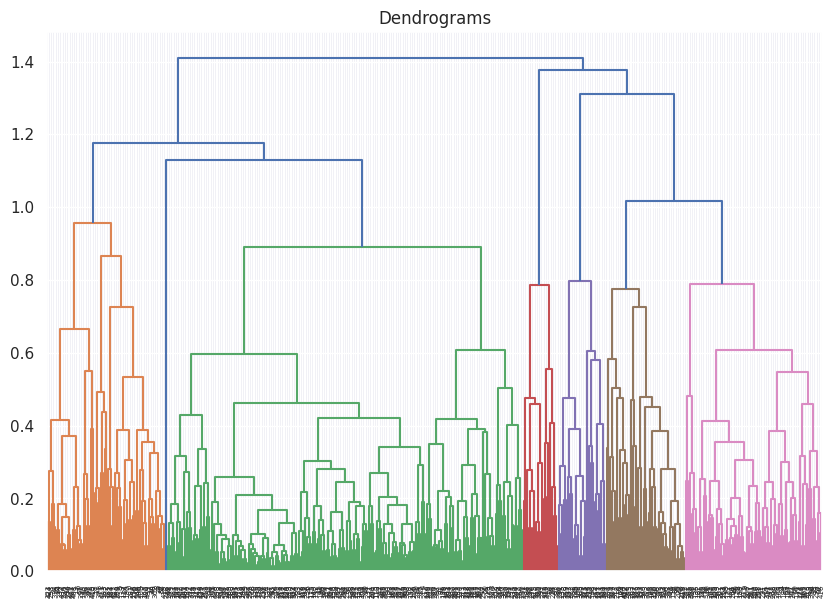

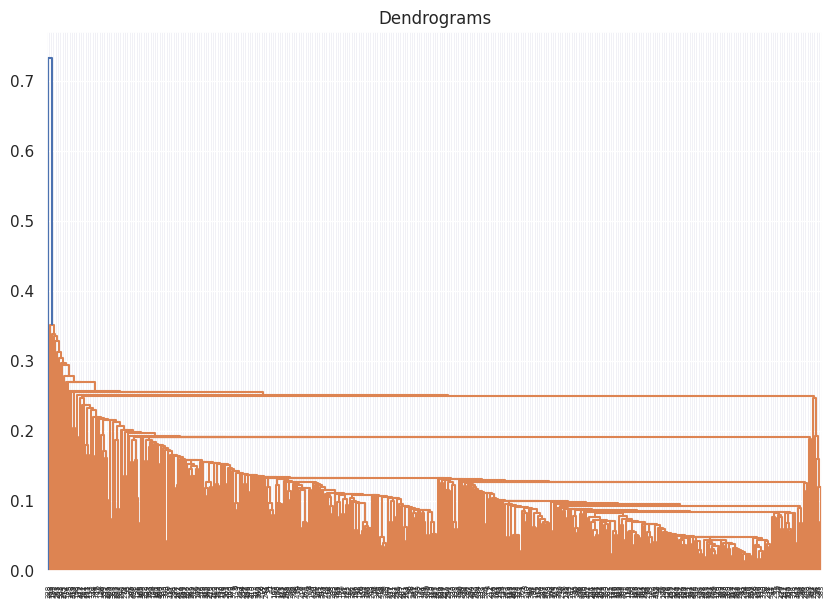

In [33]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

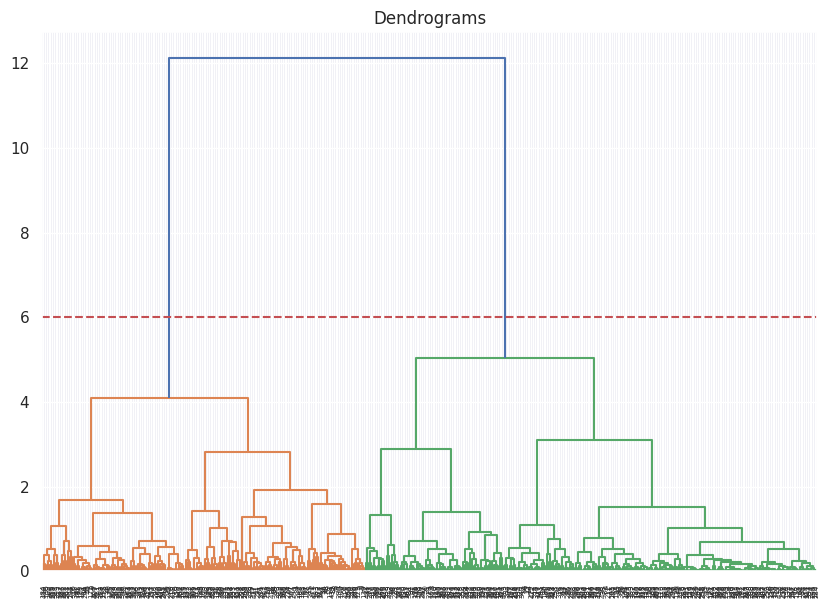

In [34]:
threshold = 6 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

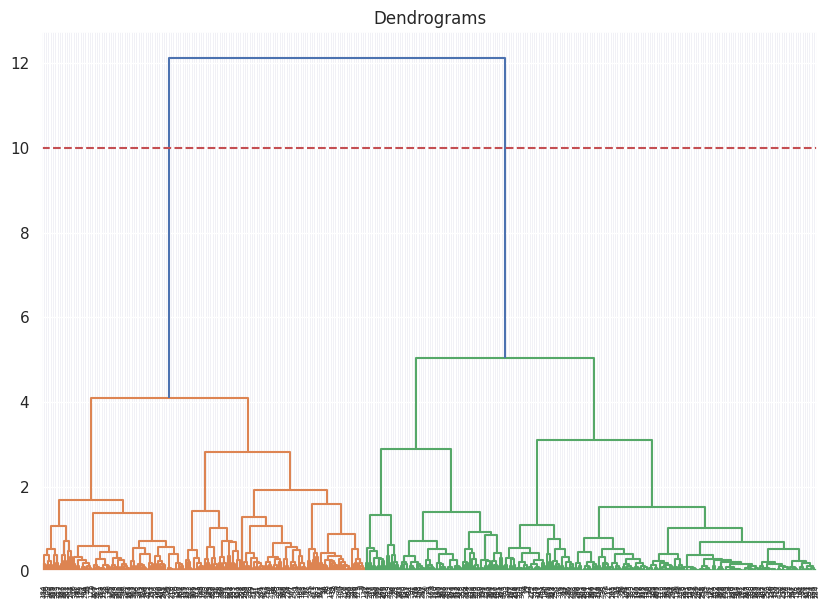

In [37]:
threshold = 10 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

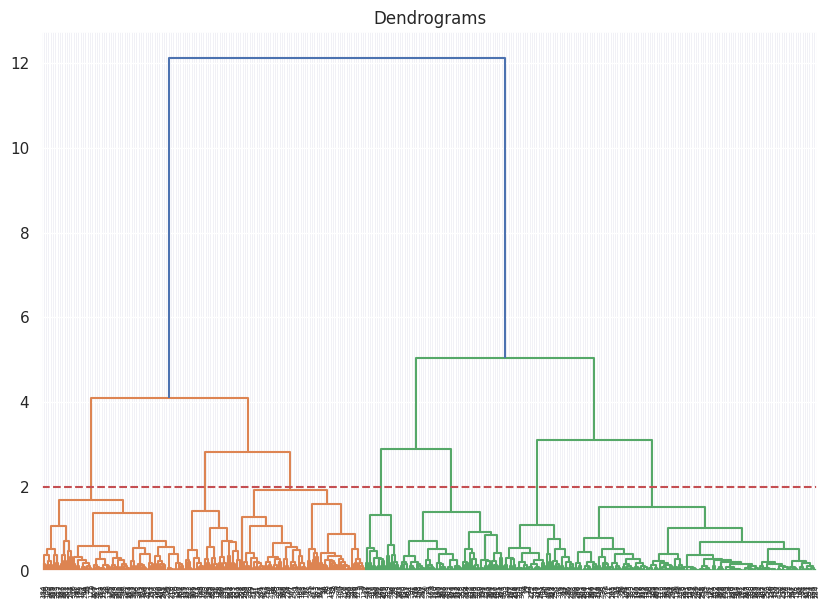

In [36]:
threshold = 2 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

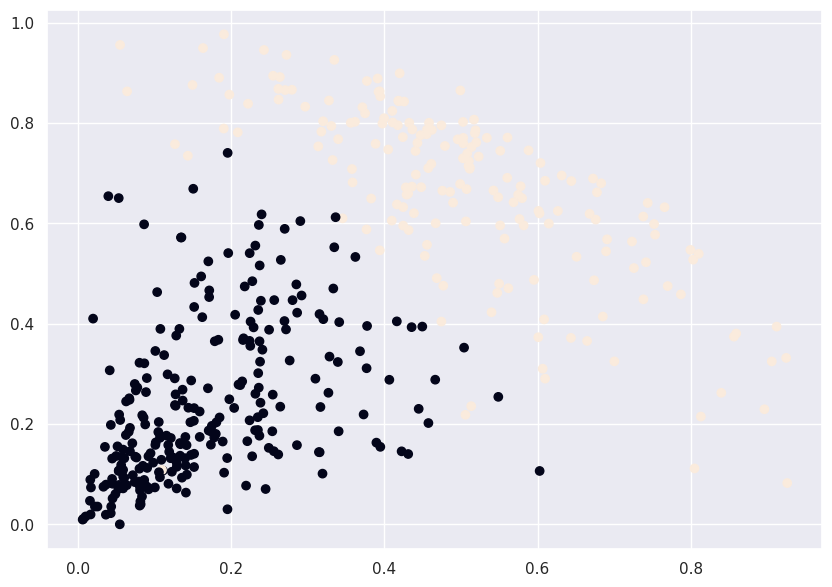

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

#What is the need for hierarchical clustering and its advantages over KMeans?

Need for Hierarchical Clustering

Hierarchical clustering is useful when:

The number of clusters is unknown - Unlike K-Means, it does not require pre-specifying the number of clusters (k).

Clusters have complex shapes - It works well when clusters are not spherical, unlike K-Means, which assumes convex clusters.

Interpretable cluster hierarchy is needed - It produces a dendrogram, which provides a visual representation of how data points are grouped at different levels.

Better initialization - It does not rely on random initialization, making it more stable compared to K-Means, which is sensitive to centroid selection.

Smaller datasets - Hierarchical clustering is computationally expensive but works well for small to medium-sized datasets where an exact cluster structure is needed.

When to use Hierarchial clustering?

*  When you do not know the number of clusters in advance.
*  When you need a hierarchy of clusters for better interpretability.
*  When working with small datasets where computation is not a major issue.

When to Use K-Means Instead?


*   When working with large datasets (since K-Means is more efficient).
*   When you have a clear idea of the number of clusters.
*   When scalability and speed are more important than hierarchical structure.

Advantages of Hierarchical Clustering Over K-Means

1.No Need to Predefine the Number of Clusters

Unlike K-Means, hierarchical clustering does not require specifying the number of clusters beforehand.

2.Works Well with Non-Spherical Clusters

It can detect arbitrarily shaped clusters, while K-Means assumes clusters are convex and spherical.

3.Produces a Hierarchical Structure

Generates a dendrogram, which provides a tree-like representation of how data points are grouped at different levels.

4.More Stable Results

It is deterministic and does not depend on random initialization like K-Means, which can produce different results in different runs.

5.Better at Handling Small Datasets

While computationally expensive, hierarchical clustering works well when the dataset is small, where precise clustering is needed.

6.Flexibility in Choosing Clusters

The dendrogram allows users to cut the hierarchy at different levels to obtain different numbers of clusters, offering greater flexibility.

7.Can Identify Nested Clusters

Unlike K-Means, hierarchical clustering reveals relationships between clusters, showing how smaller clusters merge into larger ones.

8.More Robust to Outliers

Since it does not depend on mean-based centroid calculations, hierarchical clustering is less affected by outliers compared to K-Means.

#What is the advantages of Density Based Clustering over KMeans?

Advantages of Density-Based Clustering (e.g., DBSCAN) Over K-Means

No Need to Predefine the Number of Clusters

Unlike K-Means, DBSCAN automatically determines the number of clusters based on density, eliminating the need to specify k.

Detects Arbitrary-Shaped Clusters

DBSCAN can identify clusters of any shape, while K-Means assumes spherical clusters, making it ineffective for complex cluster structures.

Handles Noise and Outliers Well

DBSCAN separates outliers as noise rather than forcing them into clusters, whereas K-Means assigns every point to a cluster, making it sensitive to outliers.

No Sensitivity to Cluster Size Variations

DBSCAN can handle clusters of different densities, while K-Means tends to form clusters of similar sizes due to its centroid-based approach.

Does Not Rely on Random Initialization

K-Means is affected by random centroid initialization, leading to different results in different runs. DBSCAN, being density-based, produces stable results without random initialization.

Can Identify Overlapping Clusters

DBSCAN can recognize clusters with varying densities, unlike K-Means, which struggles when clusters overlap.

When to Use DBSCAN Instead of K-Means?
* When clusters are not spherical or have irregular shapes.
* When outliers are present and should not be assigned to a cluster.
* When the number of clusters is unknown and should be determined automatically.
* When dealing with clusters of varying densities.

When to Use K-Means Instead?
* When working with large datasets, as DBSCAN struggles with high-dimensional and very large data.
* When clusters are well-separated and spherical.
* When you need fast clustering, as K-Means is computationally more efficient than DBSCAN for large datasets.

DBSCAN is a powerful alternative to K-Means when working with noisy, non-spherical, and irregularly shaped data distributions.